Luego de realizar le one-hot-encoding de 110 columnas pase a 190 por lo que considero que puede ser beneficioso para mi clustering realizar un PCA para asi retener la mayor cantidad de varianza en los datos.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder
import sklearn
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

In [49]:
df = pd.read_csv("data_4.csv")
df.head(2)

,esg_score21,esg_class21,environ_score21,environ_class21,social_score21,social_class21,govern_score21,govern_class21,turnover21,firm_age,...,sectors_Metals & Metal Products,"sectors_Public Administration, Education, Health Social Services",sectors_Retail,sectors_Transport Manufacturing,sectors_Utilities,audit_status21_Audit n.a.,audit_status21_Missing,audit_status21_No auditado,audit_status21_Salvedades,audit_status21_Sin opinión
0,-0.569247,-0.345854,-1.721908,-0.231856,-1.041523,-0.34062,0.656902,0.766337,1.061682,-1.131157,...,-0.306401,-0.029774,-0.326808,-0.241562,-0.212202,-0.288945,-1.366672,-0.022077,-0.156524,-0.016303
1,0.534502,-0.345854,0.446051,-0.231856,-0.150737,-0.34062,1.204951,0.766337,1.361008,0.050243,...,-0.306401,-0.029774,3.059904,-0.241562,-0.212202,-0.288945,-1.366672,-0.022077,-0.156524,-0.016303


Conozco el numero de componentes que retinen el 90% de la varianza

1. Aplico PCA para reducir la dimensionalidad

97 componentes retienen aproximadamente el 90% de la varianza del dataset. Esto significa que el PCA ha logrado reducir las 190 columnas originales a 97 componentes principales sin perder mucha info

In [37]:
X = df  
pca = PCA(n_components=10)

X_pca = pca.fit_transform(X)

# Creo un DataFrame con las componentes principales
columns_pca = [f'PC{i+1}' for i in range(10)]
df_pca = pd.DataFrame(X_pca, columns=columns_pca)

# Mostrar el DataFrame con las 10 componentes principales
print(df_pca.head())

# Verificar la varianza explicada
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance)
print("Varianza total explicada:", sum(explained_variance))

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.730145  2.902740  3.466206  3.089480  5.778977 -4.770941 -0.704717   
1  5.214533  4.420837 -0.304757  0.576945  4.028668 -3.989763  2.221145   
2  6.827113 -2.596645  4.463616  0.956746  4.007421 -7.420173 -1.792980   
3  2.073856  0.479447  3.396508  2.857976  5.180949 -5.725671  0.094725   
4 -0.952218 -1.048936  1.002979 -0.884729  5.575894 -4.269575  1.883823   

        PC8       PC9      PC10  
0  0.498619 -0.768987  1.623952  
1 -1.776959  0.233144 -2.994313  
2  0.728080 -0.019304  1.572013  
3  0.162521  0.466770  1.402212  
4 -0.973628  2.399547 -0.786030  
Varianza explicada por cada componente: [0.18634293 0.07239586 0.0511048  0.04342463 0.03348803 0.03039767
 0.02582099 0.02270018 0.02066639 0.02002613]
Varianza total explicada: 0.5063676108879447


Primera componente (PC1): Explica el 18.44% de la varianza.
Las primeras 10 componentes sumaban un 50.3%, pero al agregar las siguientes 10 componentes, logras retener un 14% adicional.
La disminución progresiva de la varianza explicada por cada componente (p.ej., PC1: 18.4%, PC20: 0.98%) es normal, y puedes ver que las últimas componentes agregan menos información

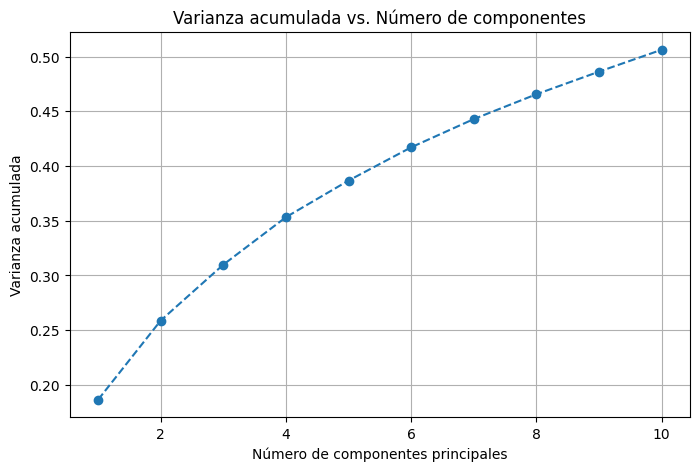

In [39]:
# Simulación de cumulative_variance (varianza acumulada)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Ajustar x para coincidir con la longitud de cumulative_variance
num_components = len(cumulative_variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_components + 1), cumulative_variance, marker='o', linestyle='--')

# Etiquetas y título
plt.title('Varianza acumulada vs. Número de componentes')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.grid()

plt.show()


Aproximadamente entre 5 y 7 componentes es donde la curva comienza a suavizarse, a partir de ese punto agregar más componentes puede no incrementar la varianza explicada

In [43]:
# Guardar el DataFrame reducido en un CSV
output_file = 'componentes_pca.csv'
df_pca.to_csv(output_file, index=False)
print(f"El archivo con las componentes principales ha sido guardado como '{output_file}'.")

El archivo con las componentes principales ha sido guardado como 'componentes_pca.csv'.


Para entender la relación entre las columnas originales y las componentes principales, guardo la matriz de componentes.
Los loadings indican cuánto contribuye cada variable original a cada componente principal. Son fundamentales para interpretar qué representan las PCs.

In [29]:
# Obtener los loadings del PCA
pca_loadings = pd.DataFrame(
    pca.components_.T,  # Transponer para que las variables sean filas
    columns=[f'Dimensión {i+1}' for i in range(pca.n_components_)],  # Nombres de las componentes principales
    index=df.columns  # Nombres de las columnas originales
)

# Mostrar los loadings
print("Matriz de Componentes (Loadings):")
print(pca_loadings.head())

# Guardar la matriz de loadings en CSV
output_loadings_file = 'pca_componentes_matriz.csv'
pca_loadings.to_csv(output_loadings_file)
print(f"Matriz de componentes PCA guardada como '{output_loadings_file}'.")


Matriz de Componentes (Loadings):
                 Dimensión 1  Dimensión 2  Dimensión 3  Dimensión 4  \
esg_score21         0.172161    -0.011622     0.023203    -0.023093   
esg_class21         0.127519     0.034004     0.016592     0.022418   
environ_score21     0.162165     0.039991     0.020477     0.021402   
environ_class21     0.104424     0.019769     0.000893     0.028159   
social_score21      0.158778    -0.041085     0.015577    -0.041974   

                 Dimensión 5  Dimensión 6  Dimensión 7  Dimensión 8  \
esg_score21         0.096087     0.103168    -0.100593     0.052598   
esg_class21         0.048059     0.091077    -0.116967     0.020743   
environ_score21    -0.028718     0.111068    -0.083924     0.071030   
environ_class21     0.005098     0.085165    -0.116611     0.007052   
social_score21      0.025023     0.136887    -0.149290     0.025519   

                 Dimensión 9  Dimensión 10  
esg_score21         0.085959     -0.006068  
esg_class21         0.